<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/CHNS_pexam_pub_12_U24BU36U39U42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


###### U24B  AGE (YEARS) AT DIABETES DIAGNOSIS อายุ (ปี) ที่การวินิจฉัยโรคเบาหวาน
###### U24J1 DIAGNOSED WITH MYOCARDIAL INFARCTION:HOW OLD วินิจฉัยว่าเป็นโรคกล้ามเนื้อหัวใจตาย:อายุเท่าไหร่
###### U24J2 HAD MYOCARDIAL INFARCTION IN THE PAST YEAR มีกล้ามเนื้อหัวใจตายในปีที่ผ่านมา
###### U24K AGE (YEARS) AT MYOCARDIAL INFARCTION อายุ (ปี) ที่กล้ามเนื้อหัวใจตาย
###### U24M AGE (YEARS) AT APOPLEXY 
###### U24O AGE (YEARS) AT 1ST BONE FRACTURE อายุ (ปี) ที่กระดูกหักครั้งแรก
###### U31 AGE (YEARS) STARTED SMOKING A PIPE 
###### U33 OF LIANG(50GM) TOBACCO USES PER MONTH 
###### U36 AVG # OF CUPS OF TEA DRINKS PER DAY จำนวนเครื่องดื่มชาเฉลี่ยต่อวัน
###### U39 AVG # OF CUPS OF COFFEE DRINKS PER DAY จำนวนดื่มกาแฟเฉลี่ยต่อวัน
###### U42 BEER: # OF BOTTLES DRINKS EACH WEEK จำนวนดื่มเบียร์เฉลี่ยทุกสัปดาห์

In [5]:
table = df[['IDind', 'U24B', 'U36', 'U39', 'U42']]
table

,IDind,U24B,U36,U39,U42
0,1.111010e+11,NaN,3.0,NaN,NaN
1,1.111010e+11,NaN,NaN,NaN,NaN
2,1.111010e+11,62.0,3.0,NaN,NaN
3,1.111010e+11,38.0,NaN,NaN,NaN
4,1.111010e+11,NaN,NaN,NaN,NaN
...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN
126404,5.523042e+11,NaN,NaN,NaN,1.0
126405,5.523042e+11,NaN,NaN,NaN,NaN
126406,5.523042e+11,NaN,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24B', 'U36', 'U39', 'U42'])
table1

,IDind,U24B,U36,U39,U42
6347,2.121011e+11,47.0,4.0,2.0,12.0
13623,2.311010e+11,52.0,4.0,1.0,2.0
15568,2.312020e+11,44.0,1.0,2.0,1.0
23429,3.113020e+11,41.0,5.0,1.0,1.0
25743,3.211021e+11,42.0,5.0,1.0,10.0
110852,5.211090e+11,42.0,-9.0,-9.0,-9.0
124158,5.512010e+11,50.0,1.0,1.0,1.0
125022,5.521010e+11,34.0,2.0,-9.0,9.0


In [7]:
x = table1[['U36', 'U39', 'U42']]
y = table1["U24B"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U36"],
                                "x2"    : table1['U39'],
                                'x3'    : table1['U42'],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,x2,x3,y,y_hat,e
6347,4.0,2.0,12.0,47.0,45.731791,1.268209
13623,4.0,1.0,2.0,52.0,45.376893,6.623107
15568,1.0,2.0,1.0,44.0,48.363554,-4.363554
23429,5.0,1.0,1.0,41.0,44.880876,-3.880876
25743,5.0,1.0,10.0,42.0,44.145633,-2.145633
110852,-9.0,-9.0,-9.0,42.0,42.067420,-0.067420
124158,1.0,1.0,1.0,50.0,47.191719,2.808281
125022,2.0,-9.0,9.0,34.0,34.242114,-0.242114


In [26]:
table_data_new.to_csv('CHNS_pexam_pub_12_U24BU36U39U42.csv')
files.download('CHNS_pexam_pub_12_U24BU36U39U42.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

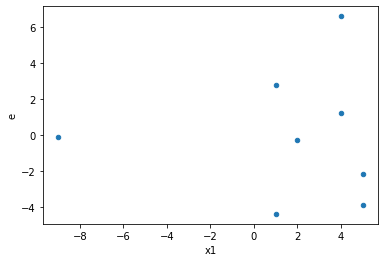

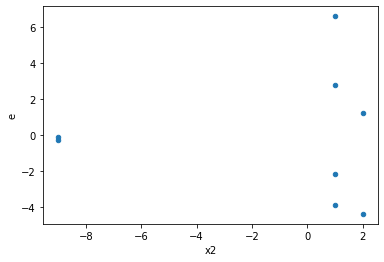

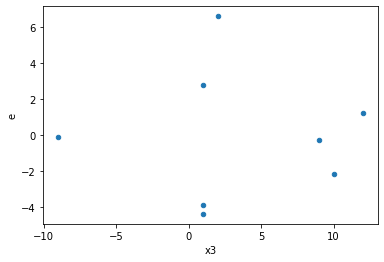

In [8]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')
table_data_new.plot(x ='x2', y='e', kind = 'scatter')
table_data_new.plot(x ='x3', y='e', kind = 'scatter')

In [9]:
# เรียง data จากน้อยไปมากตาม y_hat
new_table_sort = table_data_new.sort_values('y_hat')
new_table_sort.reset_index(inplace=True)
new_table_sort.drop(['index'], axis=1, inplace=True)
new_table_sort

,x1,x2,x3,y,y_hat,e
0,2.0,-9.0,9.0,34.0,34.242114,-0.242114
1,-9.0,-9.0,-9.0,42.0,42.067420,-0.067420
2,5.0,1.0,10.0,42.0,44.145633,-2.145633
3,5.0,1.0,1.0,41.0,44.880876,-3.880876
4,4.0,1.0,2.0,52.0,45.376893,6.623107
5,4.0,2.0,12.0,47.0,45.731791,1.268209
6,1.0,1.0,1.0,50.0,47.191719,2.808281
7,1.0,2.0,1.0,44.0,48.363554,-4.363554


In [10]:
# กำหนด % การแบ่งข้อมูล
percent_data = 0.4

In [11]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
table_new1

,x1,x2,x3,y,y_hat,e
0,2.0,-9.0,9.0,34.0,34.242114,-0.242114
1,-9.0,-9.0,-9.0,42.0,42.067420,-0.067420
2,5.0,1.0,10.0,42.0,44.145633,-2.145633


In [13]:
# แบ่งข้อมูลกลุ่มที่ 1
table_new1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
y = table_new1['y']
x = table_new1[['x1', 'x2', 'x3']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 1
DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
DF1

1.0

In [15]:
SSE1

1.6963664905872638e-26

In [16]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
table_new2

,x1,x2,x3,y,y_hat,e
4,4.0,1.0,2.0,52.0,45.376893,6.623107
5,4.0,2.0,12.0,47.0,45.731791,1.268209
6,1.0,1.0,1.0,50.0,47.191719,2.808281
7,1.0,2.0,1.0,44.0,48.363554,-4.363554


In [17]:
# แบ่งข้อมูลกลุ่มที่ 2
table_new2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]
y = table_new1['y']
x = table_new1[['x1', 'x2', 'x3']]

# add constant to predictor variable
x = sm.add_constant(x)
# fit linear regression model
model2 = sm.OLS(y, x).fit()

# หาค่า df กลุ่ม 2
DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
DF2

1.0

In [19]:
SSE2

1.6963664905872638e-26

In [20]:
# ค่าสถิติทดสอบ
GQ_test = (SSE2/DF2) / (SSE1/DF1)
GQ_test

1.0

In [21]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test, DF2, DF1)

In [22]:
two_tailed

0.9999999999999998

In [23]:
p_greater

0.5000000000000001

In [24]:
p_less

0.4999999999999999

In [25]:
Significance = 0.05
if two_tailed < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=1 : Homoscedasticity
